In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [40]:
time_6M = pd.read_csv('data/Project1/공공자전거/서울특별시 공공자전거 이용정보(시간대별)_22.06.csv', 
                 encoding='ansi')
time_6M.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3


In [41]:
time_9M = pd.read_csv('data/Project1/공공자전거/서울특별시 공공자전거 이용정보(시간대별)_22.09.csv', 
                 encoding='ansi')
time_9M.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-09-01,0,1665,1665. 양지근린공원앞,정기권,NaN,~10대,1,18.79,0.17,730.00,3
1,2022-09-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,36.41,0.40,1735.03,11
2,2022-09-01,0,1165,1165. 마곡중학교 후문,정기권,NaN,~10대,1,0.00,0.00,0.00,1
3,2022-09-01,0,764,764. 목동청소년수련관,정기권,NaN,~10대,1,27.95,0.22,941.14,6
4,2022-09-01,0,3533,3533. 건대입구역 사거리(롯데백화점),정기권,NaN,~10대,1,61.05,0.55,2371.67,20


In [8]:
# csv 목록 불러오기
from glob import glob
file_names = glob("./data/Project1/공공자전거/*.csv")
file_names

['./data/Project1/공공자전거\\서울특별시 공공자전거 이용정보(시간대별)_22.06.csv',
 './data/Project1/공공자전거\\서울특별시 공공자전거 이용정보(시간대별)_22.09.csv']

## 1. 6월 9월 시간대별 파일 합치기

In [9]:
# 6,9월 데이터 합치기
df_time_total = pd.DataFrame()
for file_name in file_names:
    temp = pd.read_csv(file_name, sep=',', encoding='ansi')
    df_time_total = pd.concat([df_time_total, temp],ignore_index=True)

In [10]:
df_time_total
df_total= df_time_total.copy()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,NaN,~10대,1,48.30,0.46,1999.70,10
1,2022-06-01,0,2059,2059. 보라매공원 정문,정기권,NaN,~10대,1,27.47,0.23,991.00,9
2,2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,20.63,0.20,868.17,3
3,2022-06-01,0,750,750. 연의근린공원 건너편,정기권,NaN,~10대,1,13.97,0.13,560.00,4
4,2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,NaN,~10대,1,12.15,0.14,590.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7805007,2022-09-30,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,69.46,0.53,2277.98,19
7805008,2022-09-30,23,2102,2102. 봉림교 교통섬,정기권,M,기타,1,17.01,0.17,740.80,3
7805009,2022-09-30,23,2337,2337. 대모산입구역 2번출구 앞,정기권,M,기타,1,16.12,0.14,598.60,3
7805010,2022-09-30,23,1414,1414. 사가정역 2번출구,정기권,M,기타,1,103.34,0.71,3070.00,19


In [11]:
df_total.info()
df_total.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805012 entries, 0 to 7805011
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 714.6+ MB


(7805012, 12)

#### 분석에 필요한 부분 결측치 확인

In [12]:
df_total['대여일자'].isnull().sum()
df_total['연령대코드'].isnull().sum()

0

0

## 2. 전체 이용자 분석

### 2-1) 대여일자를 날짜형식으로 바꾸기

In [13]:
# 대여일자(object)를 (datetime)형식으로 변경
df_total['대여일자'] = pd.to_datetime(df_total['대여일자'], infer_datetime_format=True)
df_total['대여일자']

0         2022-06-01
1         2022-06-01
2         2022-06-01
3         2022-06-01
4         2022-06-01
             ...    
7805007   2022-09-30
7805008   2022-09-30
7805009   2022-09-30
7805010   2022-09-30
7805011   2022-09-30
Name: 대여일자, Length: 7805012, dtype: datetime64[ns]

### 2-2) 대여일자 요일별 카운트

In [18]:
# 요일별 대여횟수 카운트
monday = len(df_total.query('대여일자.dt.dayofweek == 0'))
tuesday = len(df_total.query('대여일자.dt.dayofweek == 1'))
wednesday = len(df_total.query('대여일자.dt.dayofweek == 2'))
thursday = len(df_total.query('대여일자.dt.dayofweek == 3'))
friday = len(df_total.query('대여일자.dt.dayofweek == 4'))
saturday = len(df_total.query('대여일자.dt.dayofweek == 5'))
sunday = len(df_total.query('대여일자.dt.dayofweek == 6'))

In [15]:
# 각각 카운드된 대여횟수를 DataFrame으로 만들기
day_week = pd.DataFrame(data = [monday,tuesday,wednesday,
                                thursday,friday,
                                saturday,sunday], 
                        index =['월','화','수','목','금','토','일'],
                     columns =['대여건수'])
day_week

,대여건수
월,953533
화,1139325
수,1208674
목,1269091
금,1284327
토,1071632
일,878430


### 2-3) 전체 이용자의 요일별 대여현황

<AxesSubplot:>

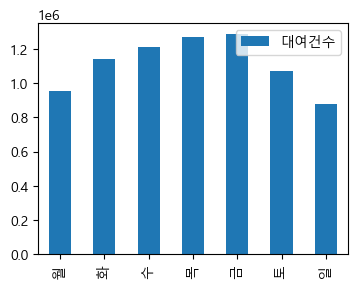

In [16]:
# 전체 이용자 요일별 대여횟수를 합한 그래프
day_week.plot.bar(figsize = (4,3))

주말에 이용자수가 많을 것이라 예상했던 것과 달리 수,목,금요일에 이용자수가 높다. 

### 2-4) 전체 이용자의 시간대별 대여현황 

In [20]:
# 대여시간별 대여횟수 합 DataFrame 만들기
time =pd.DataFrame(df_total['대여시간'].value_counts()).sort_index()
time

,대여시간
0,205144
1,139538
2,88303
3,57571
4,45757
5,73123
6,151517
7,351208
8,480320
9,317617


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

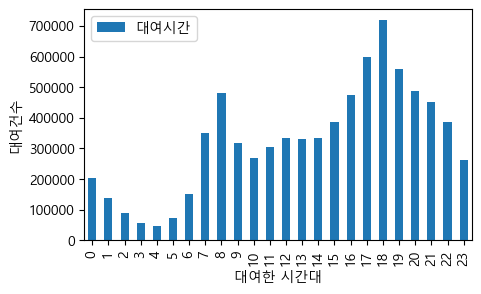

In [21]:
# 대여시간(0시~1시, 23시~ 24시) 그래프 생성
time.plot.bar(xlabel = '대여한 시간대', ylabel = '대여건수', figsize = (5,3))

출퇴근 시간대인 8시와 18시에 가장 많이 사용함을 알 수 있다. 

## 3. 20대 이용자 분석

### 3-1) 20대 이용자만 데이터목록에서 추출

In [28]:
# 사용 시간대에서 20대만 추출
time_age = df_total[df_total['연령대코드'] == '20대']
time_age

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
48,2022-06-01,0,729,729. 서부식자재마트 건너편,정기권,NaN,20대,1,56.82,0.55,2391.34,14
49,2022-06-01,0,733,733. 신정이펜하우스314동,정기권,NaN,20대,1,151.63,1.27,5470.00,30
50,2022-06-01,0,734,734. 신트리공원 입구,정기권,NaN,20대,1,22.25,0.20,851.29,3
51,2022-06-01,0,747,747. 목동3단지 상가,정기권,NaN,20대,1,25.25,0.17,750.00,27
52,2022-06-01,0,948,948. 디지털미디어 시티역 4번출구(DMC역),정기권,NaN,20대,1,26.95,0.19,820.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7804645,2022-09-30,23,2156,2156. 신림푸르지오아파트,정기권,M,20대,1,124.76,1.00,4315.76,31
7804646,2022-09-30,23,1149,1149. 신방화역환승주차장,정기권,M,20대,1,18.79,0.17,730.00,4
7804647,2022-09-30,23,3500,3500. 군자역2번출구,정기권,M,20대,3,238.82,1.78,7642.01,61
7804648,2022-09-30,23,3504,3504. 원일교회,정기권,M,20대,1,14.26,0.10,450.00,3


### 3-2) 20대 기준 대여일자 요일별 카운트

In [30]:
# 20대의 요일별 대여횟수 카운트
monday = len(time_age.query('대여일자.dt.dayofweek == 0'))
tuesday = len(time_age.query('대여일자.dt.dayofweek == 1'))
wednesday = len(time_age.query('대여일자.dt.dayofweek == 2'))
thursday = len(time_age.query('대여일자.dt.dayofweek == 3'))
friday = len(time_age.query('대여일자.dt.dayofweek == 4'))
saturday = len(time_age.query('대여일자.dt.dayofweek == 5'))
sunday = len(time_age.query('대여일자.dt.dayofweek == 6'))

In [31]:
# 각각 카운드된 대여횟수를 DataFrame으로 만들기
day_week_20s = pd.DataFrame(data = [monday,tuesday,wednesday,
                                thursday,friday,
                                saturday,sunday], 
                        index =['월','화','수','목','금','토','일'],
                     columns =['대여건수'])
day_week_20s

,대여건수
월,325461
화,382065
수,404522
목,426517
금,429213
토,382562
일,318430


### 3-3) 20대 이용자의 요일별 대여현황

<AxesSubplot:>

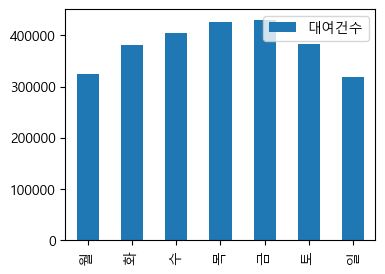

In [32]:
# 20대 이용자 요일별 대여횟수를 합한 그래프
day_week_20s.plot.bar(figsize = (4,3))

전체 이용자들의 요일별 분석과 같은 양상을 띔.
큰 차이가 없다.

### 3-4) 20대 이용자의 대여시간별 대여현황

In [23]:
# 20대의 대여시간별 대여횟수 카운트
df_time_age = pd.DataFrame(time_age['대여시간'].value_counts()).sort_index()
df_time_age

,대여시간
0,88012
1,56097
2,34913
3,21054
4,14959
5,20671
6,38528
7,86047
8,144215
9,103776


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

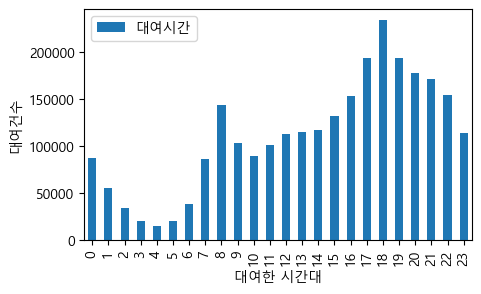

In [24]:
# 20대가 사용하는 시간대 그래프
df_time_age.plot.bar(xlabel='대여한 시간대',ylabel = '대여건수', figsize = (5,3))

전체 이용자의 시간대별 분석결과와 비슷함.

주말과 평일간에 차이가 있을 것 같아 분석 진행.

### 3-5) 20대 이용자 주말 사용시간대 분석

In [43]:
# 20대 이용자 주말 자료만 생성
Sat = time_age.query('대여일자.dt.dayofweek == 5')
Sun = time_age.query('대여일자.dt.dayofweek == 6')
weekend = pd.concat([Sat,Sun])

In [34]:
# 주말, 평일 사용 시간대 비교
weekend

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
456001,2022-06-04,0,736,736. 오솔길공원,정기권,NaN,20대,1,71.04,0.53,2300.00,12
456002,2022-06-04,0,745,745. 강서초등학교,정기권,NaN,20대,2,44.88,0.40,1750.00,13
456003,2022-06-04,0,748,748. 목동운동장,정기권,NaN,20대,1,57.38,0.48,2070.00,12
456004,2022-06-04,0,506,506. 금호 어울림 아파트 앞,정기권,NaN,20대,1,85.96,1.03,4430.00,37
456005,2022-06-04,0,950,950. 구산역 2번 출구 예일여고 버스정류장,정기권,NaN,20대,1,73.62,0.66,2860.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6996961,2022-09-25,23,826,826. 서울역 서부교차로2,정기권,M,20대,1,41.34,0.28,1200.00,5
6996962,2022-09-25,23,2139,2139. 서울신성초등학교,정기권,M,20대,1,63.61,0.58,2510.00,14
6996963,2022-09-25,23,2111,2111. 서울대입구역 1번출구,정기권,M,20대,1,14.26,0.14,600.00,3
6996964,2022-09-25,23,502,502. 뚝섬유원지역 1번출구 앞,정기권,M,20대,1,52.92,0.46,1965.32,11


In [35]:
weekend_time = pd.DataFrame(weekend['대여시간'].value_counts()).sort_index()
weekend_time

,대여시간
0,30275
1,21027
2,14152
3,8764
4,5675
5,4864
6,6380
7,10740
8,17305
9,22521


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

Text(0.5, 1.0, '20대 주말 이용시간대 분석')

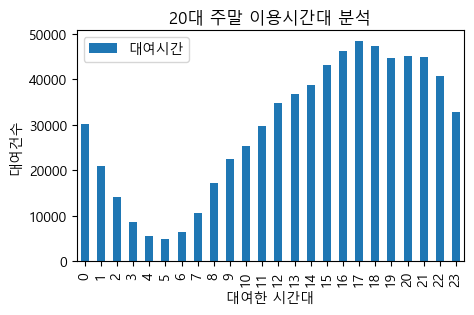

In [50]:
weekend_time.plot.bar(xlabel='대여한 시간대',ylabel = '대여건수', figsize = (5,3))
plt.title('20대 주말 이용시간대 분석')

주말의 경우 저녁시간대로 갈수록 대여량이 많아진다.

### 3-6)  20대 이용자 평일 사용시간대 분석

In [49]:
# 20대 이용자 평일 자료만 생성
mon = time_age.query('대여일자.dt.dayofweek == 0')
tues = time_age.query('대여일자.dt.dayofweek == 1')
wed = time_age.query('대여일자.dt.dayofweek == 2')
thur = time_age.query('대여일자.dt.dayofweek == 3')
fri = time_age.query('대여일자.dt.dayofweek == 4')
weekdays = pd.concat([mon,tues,wed,thur,fri])

In [38]:
weekdays_time = pd.DataFrame(weekdays['대여시간'].value_counts()).sort_index()
weekdays_time

,대여시간
0,57737
1,35070
2,20761
3,12290
4,9284
5,15807
6,32148
7,75307
8,126910
9,81255


<AxesSubplot:xlabel='대여한 시간대', ylabel='대여건수'>

Text(0.5, 1.0, '20대 평일 이용시간대 분석')

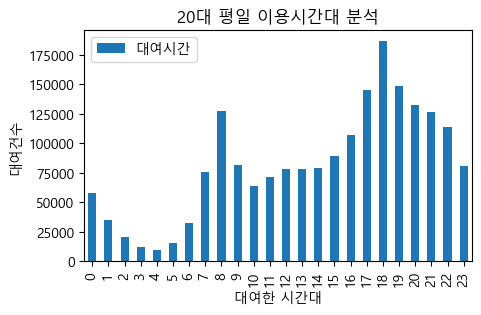

In [51]:
weekdays_time.plot.bar(xlabel='대여한 시간대',ylabel = '대여건수', figsize = (5,3))
plt.title('20대 평일 이용시간대 분석')

평일의 경우 출퇴근 시간대인 8시, 18시에 대여량이 몰려있다.